# Understanding the Exponential Distribution

**Building Intuition for a Key Probability Distribution**

## Why Study This?

The exponential distribution appears frequently in Bayesian modeling:
- **Priors on standard deviations** (e.g., σ ~ Exponential(1))
- **Waiting times** between events
- **Lifetimes** and survival analysis
- **Memoryless** processes

Just as we deeply understand the normal distribution, we need the same intuition for the exponential distribution.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('default')
%matplotlib inline

np.random.seed(42)

print('✓ Imports loaded')

✓ Imports loaded


---

## Part 1: Definition and Parameterizations

### The Exponential Distribution

**Context:** Models the **time until an event occurs** (or waiting time between events).

**Examples:**
- Time until next customer arrives at a store
- Time until a light bulb burns out
- Time between earthquakes
- Time until radioactive decay

### Two Common Parameterizations

**1. Rate Parameterization (λ):**

$$X \sim \text{Exponential}(\lambda)$$

- **λ = rate** (events per unit time)
- PDF: $f(x | \lambda) = \lambda e^{-\lambda x}$ for $x \geq 0$
- **Mean**: $E[X] = \frac{1}{\lambda}$
- **Variance**: $\text{Var}[X] = \frac{1}{\lambda^2}$

**Example:** If customers arrive at rate λ = 2 per hour:
- Mean waiting time = 1/2 = 0.5 hours = 30 minutes

---

**2. Scale Parameterization (β):**

$$X \sim \text{Exponential}(\text{scale}=\beta)$$

- **β = scale** = mean waiting time
- PDF: $f(x | \beta) = \frac{1}{\beta} e^{-x/\beta}$ for $x \geq 0$
- **Mean**: $E[X] = \beta$
- **Variance**: $\text{Var}[X] = \beta^2$

**Relationship:** $\beta = \frac{1}{\lambda}$

---

### Which Parameterization?

**Python's `scipy.stats.expon`** uses the **scale parameterization**:

```python
# This means: mean = 2
stats.expon(scale=2)

# Equivalent to rate λ = 1/2 = 0.5
```

**In Bayesian priors**, we often write:
- σ ~ Exponential(1)

This typically means **rate λ = 1**, which is **scale β = 1/1 = 1**.

---

## Part 2: Visualizing the PDF

Let's see what the exponential distribution looks like for different rates.

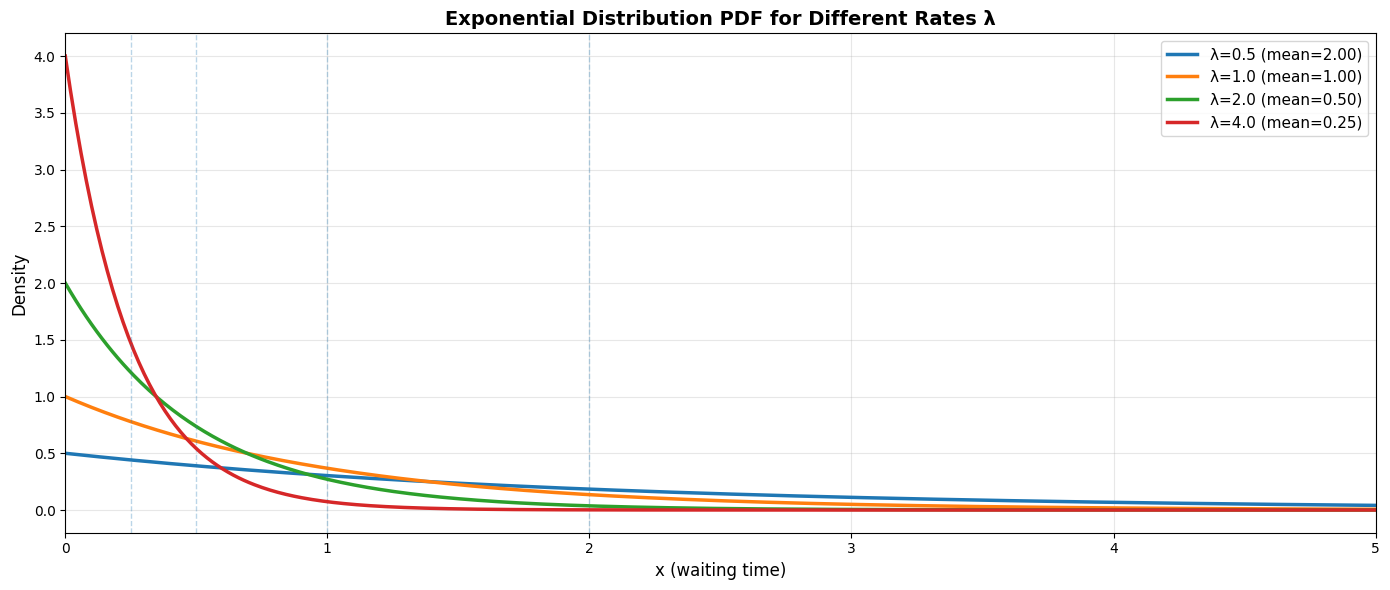

Key Observations:
• Higher rate λ → Shorter waiting times (steeper decay)
• Lower rate λ → Longer waiting times (slower decay)
• Always starts at maximum density at x=0
• Always decreasing (monotonic)
• 'Heavy tail' - small probability of very long waits


In [3]:
# Different rate parameters
rates = [0.5, 1.0, 2.0, 4.0]
x = np.linspace(0, 5, 500)

plt.figure(figsize=(14, 6))

for rate in rates:
    # In scipy, rate λ corresponds to scale = 1/λ
    scale = 1.0 / rate
    pdf = stats.expon.pdf(x, scale=scale)
    mean = 1.0 / rate
    
    plt.plot(x, pdf, linewidth=2.5, label=f'λ={rate:.1f} (mean={mean:.2f})')
    
    # Mark the mean
    plt.axvline(mean, linestyle='--', alpha=0.3, linewidth=1)

plt.xlabel('x (waiting time)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Exponential Distribution PDF for Different Rates λ', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

print("Key Observations:")
print("• Higher rate λ → Shorter waiting times (steeper decay)")
print("• Lower rate λ → Longer waiting times (slower decay)")
print("• Always starts at maximum density at x=0")
print("• Always decreasing (monotonic)")
print("• 'Heavy tail' - small probability of very long waits")

### Key Properties

**1. Always starts at x = 0**
- Maximum density at the origin
- Most likely to see short waiting times

**2. Monotonically decreasing**
- Longer waiting times become increasingly unlikely
- But never impossible (heavy tail)

**3. Rate vs Mean**
- **λ = 0.5** → mean = 2.0 (long waits on average)
- **λ = 1.0** → mean = 1.0 (our standard prior!)
- **λ = 2.0** → mean = 0.5 (short waits)
- **λ = 4.0** → mean = 0.25 (very short waits)

---

## Part 3: Understanding Exponential(1)

In Bayesian priors, we often use **Exponential(1)**. Let's understand this specific distribution.

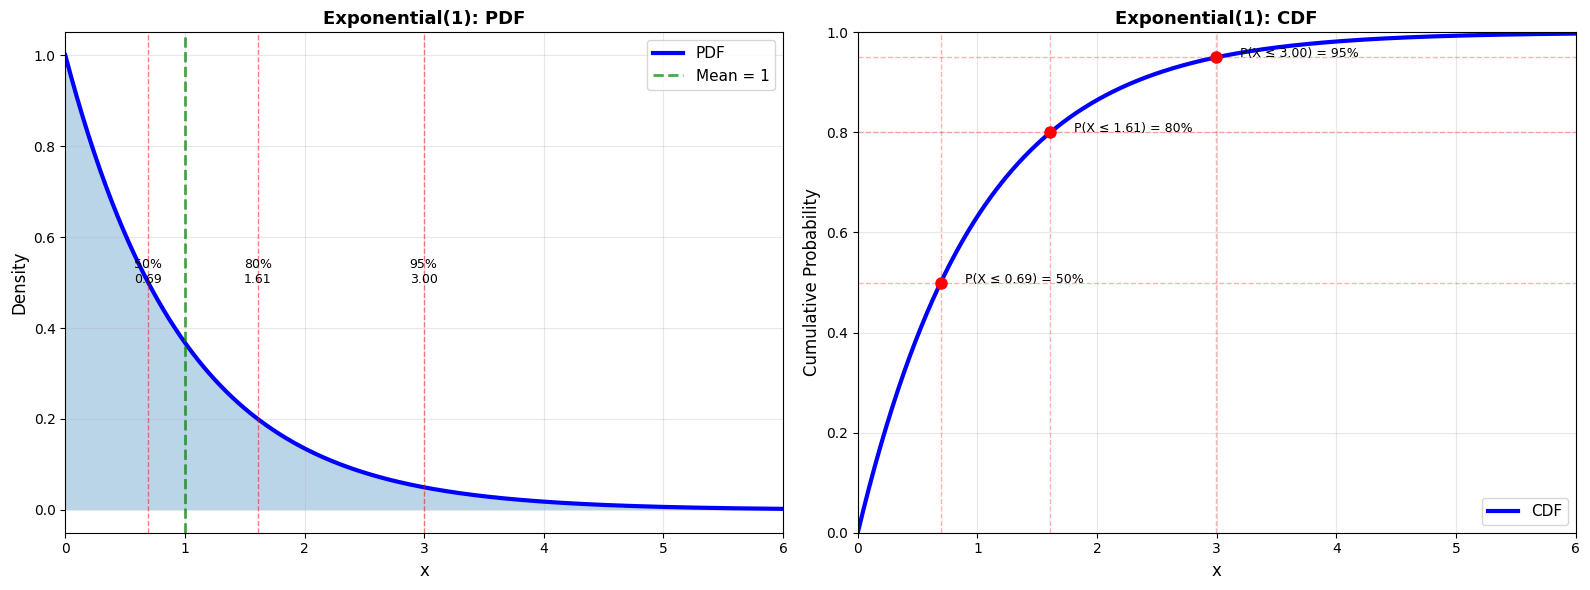

Exponential(1) Properties:
Mean:     1.000
Variance: 1.000
Std Dev:  1.000
Median:   0.693
Mode:     0 (always at origin)

Key Quantiles:
  50% of mass below: 0.693
  80% of mass below: 1.609
  95% of mass below: 2.996
  99% of mass below: 4.605


In [4]:
# Exponential(1): rate λ = 1, scale β = 1
x = np.linspace(0, 6, 500)
pdf = stats.expon.pdf(x, scale=1)  # scale=1 means rate λ=1
cdf = stats.expon.cdf(x, scale=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PDF
ax = axes[0]
ax.plot(x, pdf, 'b-', linewidth=3, label='PDF')
ax.fill_between(x, pdf, alpha=0.3)

# Mark key quantiles
quantiles = [0.5, 0.8, 0.95]
for q in quantiles:
    x_q = stats.expon.ppf(q, scale=1)
    ax.axvline(x_q, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(x_q, 0.5, f'{int(q*100)}%\n{x_q:.2f}', ha='center', fontsize=9)

# Mark mean
ax.axvline(1, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Mean = 1')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Exponential(1): PDF', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 6)

# CDF
ax = axes[1]
ax.plot(x, cdf, 'b-', linewidth=3, label='CDF')

# Mark key probabilities
for q in quantiles:
    x_q = stats.expon.ppf(q, scale=1)
    ax.axhline(q, color='red', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x_q, color='red', linestyle='--', alpha=0.3, linewidth=1)
    ax.plot(x_q, q, 'ro', markersize=8)
    ax.text(x_q + 0.2, q, f'P(X ≤ {x_q:.2f}) = {q:.0%}', fontsize=9)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('Exponential(1): CDF', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("Exponential(1) Properties:")
print("="*70)
print(f"Mean:     {stats.expon.mean(scale=1):.3f}")
print(f"Variance: {stats.expon.var(scale=1):.3f}")
print(f"Std Dev:  {stats.expon.std(scale=1):.3f}")
print(f"Median:   {stats.expon.median(scale=1):.3f}")
print(f"Mode:     0 (always at origin)")
print("\nKey Quantiles:")
print(f"  50% of mass below: {stats.expon.ppf(0.5, scale=1):.3f}")
print(f"  80% of mass below: {stats.expon.ppf(0.8, scale=1):.3f}")
print(f"  95% of mass below: {stats.expon.ppf(0.95, scale=1):.3f}")
print(f"  99% of mass below: {stats.expon.ppf(0.99, scale=1):.3f}")

### Interpretation of Exponential(1)

When we use **σ ~ Exponential(1)** as a prior:

**What it says:**
- Mean = 1 → We expect σ around 1 (on average)
- 50% probability σ < 0.69
- 95% probability σ < 3.0
- Most mass near 0, but allows larger values

**Why this is useful for σ:**
1. **Always positive** (σ must be positive!)
2. **Concentrates mass near 0** (prefer smaller σ, simpler models)
3. **Heavy tail** (allows larger σ if data demands it)
4. **Weakly informative** (doesn't strongly constrain the model)

---

## Part 4: Comparing Different Exponential Priors

What happens if we use different rates?

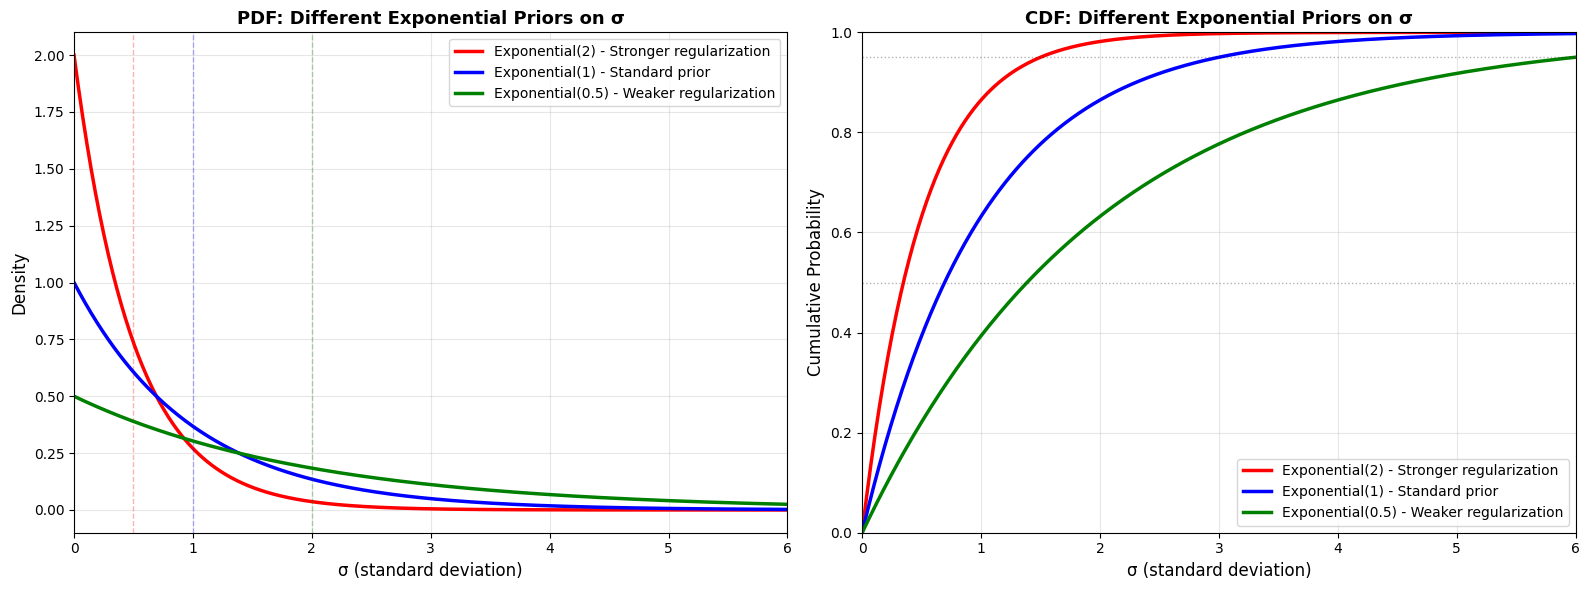

Comparison of Exponential Priors on σ:

Exponential(2) - Stronger regularization:
  Mean: 0.50
  Median: 0.35
  95% of mass below: 1.50

Exponential(1) - Standard prior:
  Mean: 1.00
  Median: 0.69
  95% of mass below: 3.00

Exponential(0.5) - Weaker regularization:
  Mean: 2.00
  Median: 1.39
  95% of mass below: 5.99

Key Insight:
• Higher rate → Stronger preference for smaller σ (more regularization)
• Lower rate → Weaker preference (less regularization)
• Exponential(1) is a reasonable default


In [5]:
# Compare different exponential priors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.linspace(0, 6, 500)
configs = [
    {'rate': 2.0, 'label': 'Exponential(2) - Stronger regularization', 'color': 'red'},
    {'rate': 1.0, 'label': 'Exponential(1) - Standard prior', 'color': 'blue'},
    {'rate': 0.5, 'label': 'Exponential(0.5) - Weaker regularization', 'color': 'green'},
]

# Plot PDFs
ax = axes[0]
for config in configs:
    rate = config['rate']
    scale = 1.0 / rate
    pdf = stats.expon.pdf(x, scale=scale)
    ax.plot(x, pdf, linewidth=2.5, label=config['label'], color=config['color'])
    ax.axvline(scale, linestyle='--', alpha=0.3, linewidth=1, color=config['color'])

ax.set_xlabel('σ (standard deviation)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('PDF: Different Exponential Priors on σ', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 6)

# Plot CDFs
ax = axes[1]
for config in configs:
    rate = config['rate']
    scale = 1.0 / rate
    cdf = stats.expon.cdf(x, scale=scale)
    ax.plot(x, cdf, linewidth=2.5, label=config['label'], color=config['color'])

ax.axhline(0.5, color='black', linestyle=':', alpha=0.3, linewidth=1)
ax.axhline(0.95, color='black', linestyle=':', alpha=0.3, linewidth=1)
ax.set_xlabel('σ (standard deviation)', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('CDF: Different Exponential Priors on σ', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("Comparison of Exponential Priors on σ:")
print("="*70)
for config in configs:
    rate = config['rate']
    scale = 1.0 / rate
    q95 = stats.expon.ppf(0.95, scale=scale)
    print(f"\n{config['label']}:")
    print(f"  Mean: {scale:.2f}")
    print(f"  Median: {stats.expon.ppf(0.5, scale=scale):.2f}")
    print(f"  95% of mass below: {q95:.2f}")

print("\n" + "="*70)
print("Key Insight:")
print("• Higher rate → Stronger preference for smaller σ (more regularization)")
print("• Lower rate → Weaker preference (less regularization)")
print("• Exponential(1) is a reasonable default")

---

## Part 5: The Memoryless Property

The exponential distribution has a unique **memoryless property**.

### What is the Memoryless Property?

**Mathematically:**

$$P(X > s + t \mid X > s) = P(X > t)$$

**In words:**

"The probability of waiting an additional time *t* is the same, regardless of how long you've already waited."

**Example (Customer Arrivals):**

Suppose customers arrive according to an exponential distribution with mean 10 minutes.

- **Before waiting:** P(wait > 10 min) = ?
- **After waiting 5 min:** P(wait *another* 10 min) = ?

**Answer:** They're the same! The distribution "forgets" that you've already waited 5 minutes.

This is **only true for the exponential distribution** (and geometric for discrete case).

---

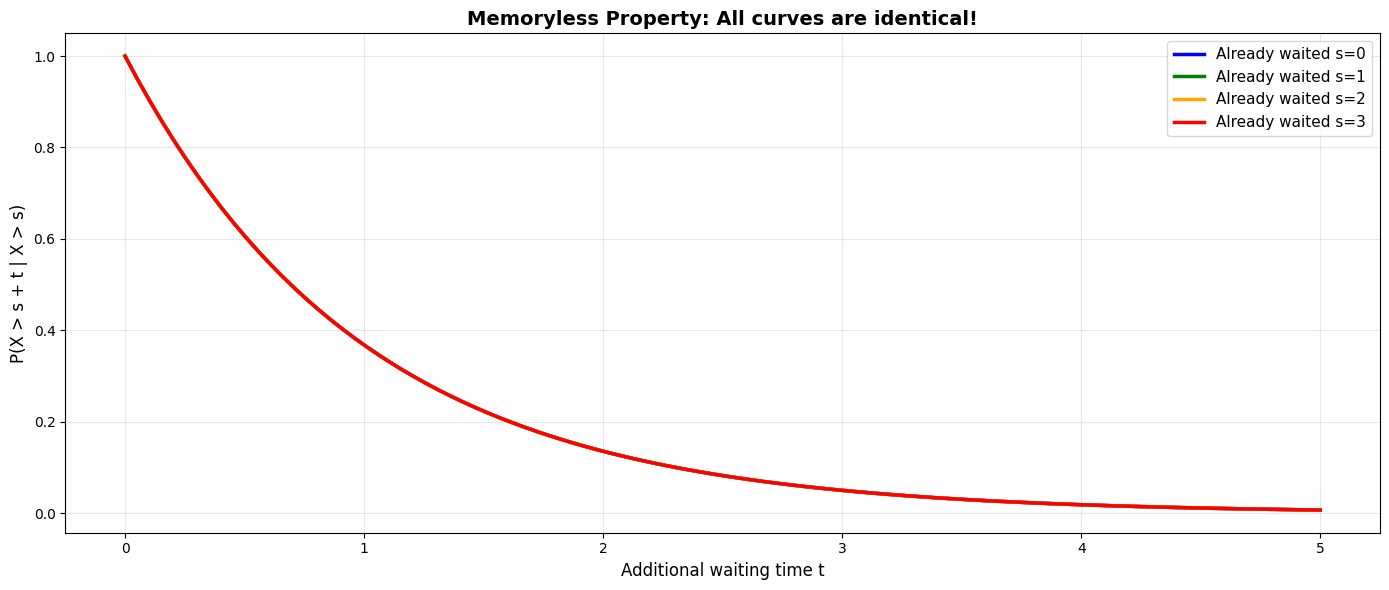

Memoryless Property Verification:
Let's check P(X > 2) vs P(X > 3 | X > 1):

P(X > 2)           = 0.135335
P(X > 3 | X > 1)   = 0.135335
Difference:          0.0000000000

✓ They're equal! The distribution 'forgets' how long you've waited.


In [6]:
# Demonstrate memoryless property
rate = 1.0
scale = 1.0 / rate

# P(X > t)
t_values = np.linspace(0, 5, 100)
prob_greater = 1 - stats.expon.cdf(t_values, scale=scale)

# P(X > s + t | X > s) for different s
s_values = [0, 1, 2, 3]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(14, 6))

for s, color in zip(s_values, colors):
    # Conditional probability: P(X > s + t | X > s) = P(X > t)
    # This should be the same for all s!
    conditional_prob = (1 - stats.expon.cdf(s + t_values, scale=scale)) / (1 - stats.expon.cdf(s, scale=scale))
    plt.plot(t_values, conditional_prob, linewidth=2.5, label=f'Already waited s={s}', color=color)

plt.xlabel('Additional waiting time t', fontsize=12)
plt.ylabel('P(X > s + t | X > s)', fontsize=12)
plt.title('Memoryless Property: All curves are identical!', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Memoryless Property Verification:")
print("="*70)
print(f"Let's check P(X > 2) vs P(X > 3 | X > 1):\n")

p_gt_2 = 1 - stats.expon.cdf(2, scale=scale)
p_gt_3_given_1 = (1 - stats.expon.cdf(3, scale=scale)) / (1 - stats.expon.cdf(1, scale=scale))

print(f"P(X > 2)           = {p_gt_2:.6f}")
print(f"P(X > 3 | X > 1)   = {p_gt_3_given_1:.6f}")
print(f"Difference:          {abs(p_gt_2 - p_gt_3_given_1):.10f}")
print("\n✓ They're equal! The distribution 'forgets' how long you've waited.")

### Why Does This Matter?

**For modeling waiting times:**
- Appropriate when events occur independently at a constant rate
- **NOT appropriate** when there's "aging" or memory
  - Light bulbs burn out faster as they age (use Weibull instead)
  - People get impatient while waiting (exponential not realistic)

**For priors on σ:**
- The memoryless property is **not directly relevant**
- We just care about: always positive, concentrates mass near 0, has heavy tail

---

## Part 6: Sampling from Exponential Distribution

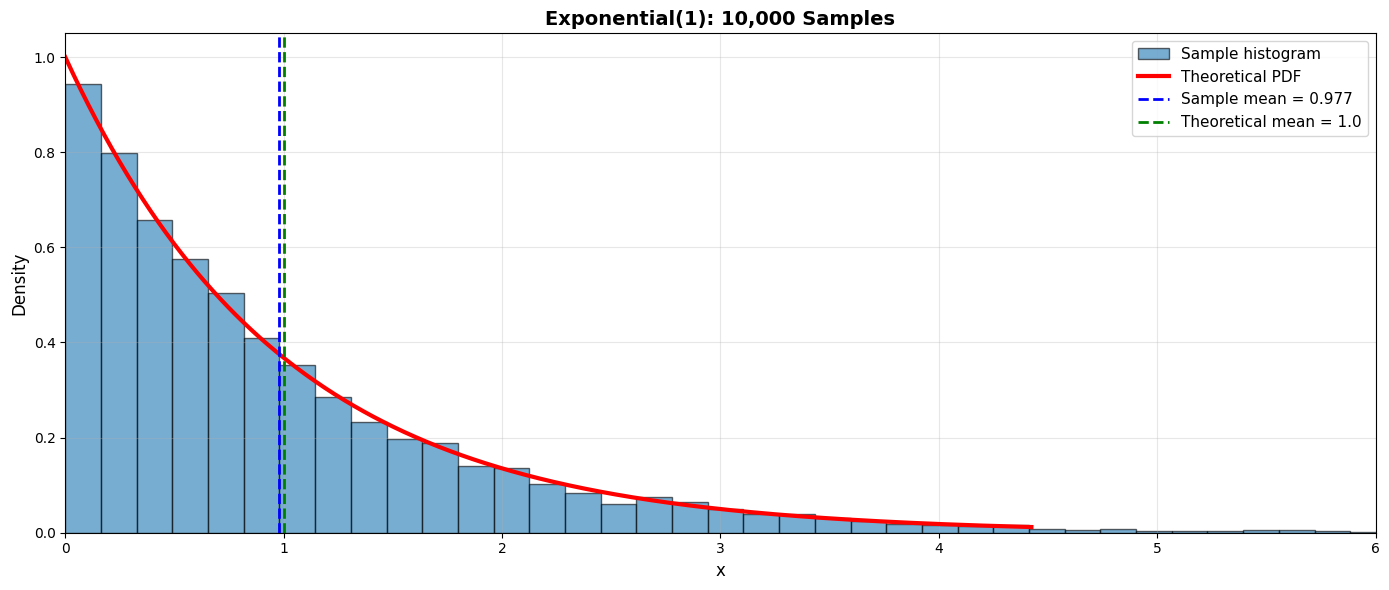

Sample Statistics vs Theoretical:
Sample mean:        0.977499  (theoretical: 1.000000)
Sample variance:    0.949370  (theoretical: 1.000000)
Sample median:      0.678315  (theoretical: 0.693147)
Sample std:         0.974356  (theoretical: 1.000000)

Percentiles:
  25%: 0.283 (theoretical: 0.288)
  50%: 0.678 (theoretical: 0.693)
  75%: 1.347 (theoretical: 1.386)
  90%: 2.261 (theoretical: 2.303)
  95%: 2.946 (theoretical: 2.996)
  99%: 4.424 (theoretical: 4.605)


In [7]:
# Generate samples
n_samples = 10000
samples = stats.expon.rvs(scale=1, size=n_samples, random_state=42)

plt.figure(figsize=(14, 6))

# Histogram
plt.hist(samples, bins=50, density=True, alpha=0.6, edgecolor='black', label='Sample histogram')

# Overlay theoretical PDF
x = np.linspace(0, np.percentile(samples, 99), 500)
pdf = stats.expon.pdf(x, scale=1)
plt.plot(x, pdf, 'r-', linewidth=3, label='Theoretical PDF')

# Mark sample mean
sample_mean = samples.mean()
plt.axvline(sample_mean, color='blue', linestyle='--', linewidth=2, label=f'Sample mean = {sample_mean:.3f}')
plt.axvline(1, color='green', linestyle='--', linewidth=2, label='Theoretical mean = 1.0')

plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Exponential(1): {n_samples:,} Samples', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 6)
plt.tight_layout()
plt.show()

print("Sample Statistics vs Theoretical:")
print("="*70)
print(f"Sample mean:        {samples.mean():.6f}  (theoretical: 1.000000)")
print(f"Sample variance:    {samples.var():.6f}  (theoretical: 1.000000)")
print(f"Sample median:      {np.median(samples):.6f}  (theoretical: {stats.expon.median(scale=1):.6f})")
print(f"Sample std:         {samples.std():.6f}  (theoretical: 1.000000)")
print(f"\nPercentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    sample_q = np.percentile(samples, p)
    theo_q = stats.expon.ppf(p/100, scale=1)
    print(f"  {p:2d}%: {sample_q:.3f} (theoretical: {theo_q:.3f})")

---

## Part 7: Why Exponential for σ Priors?

Let's understand why **σ ~ Exponential(1)** is a common prior choice.

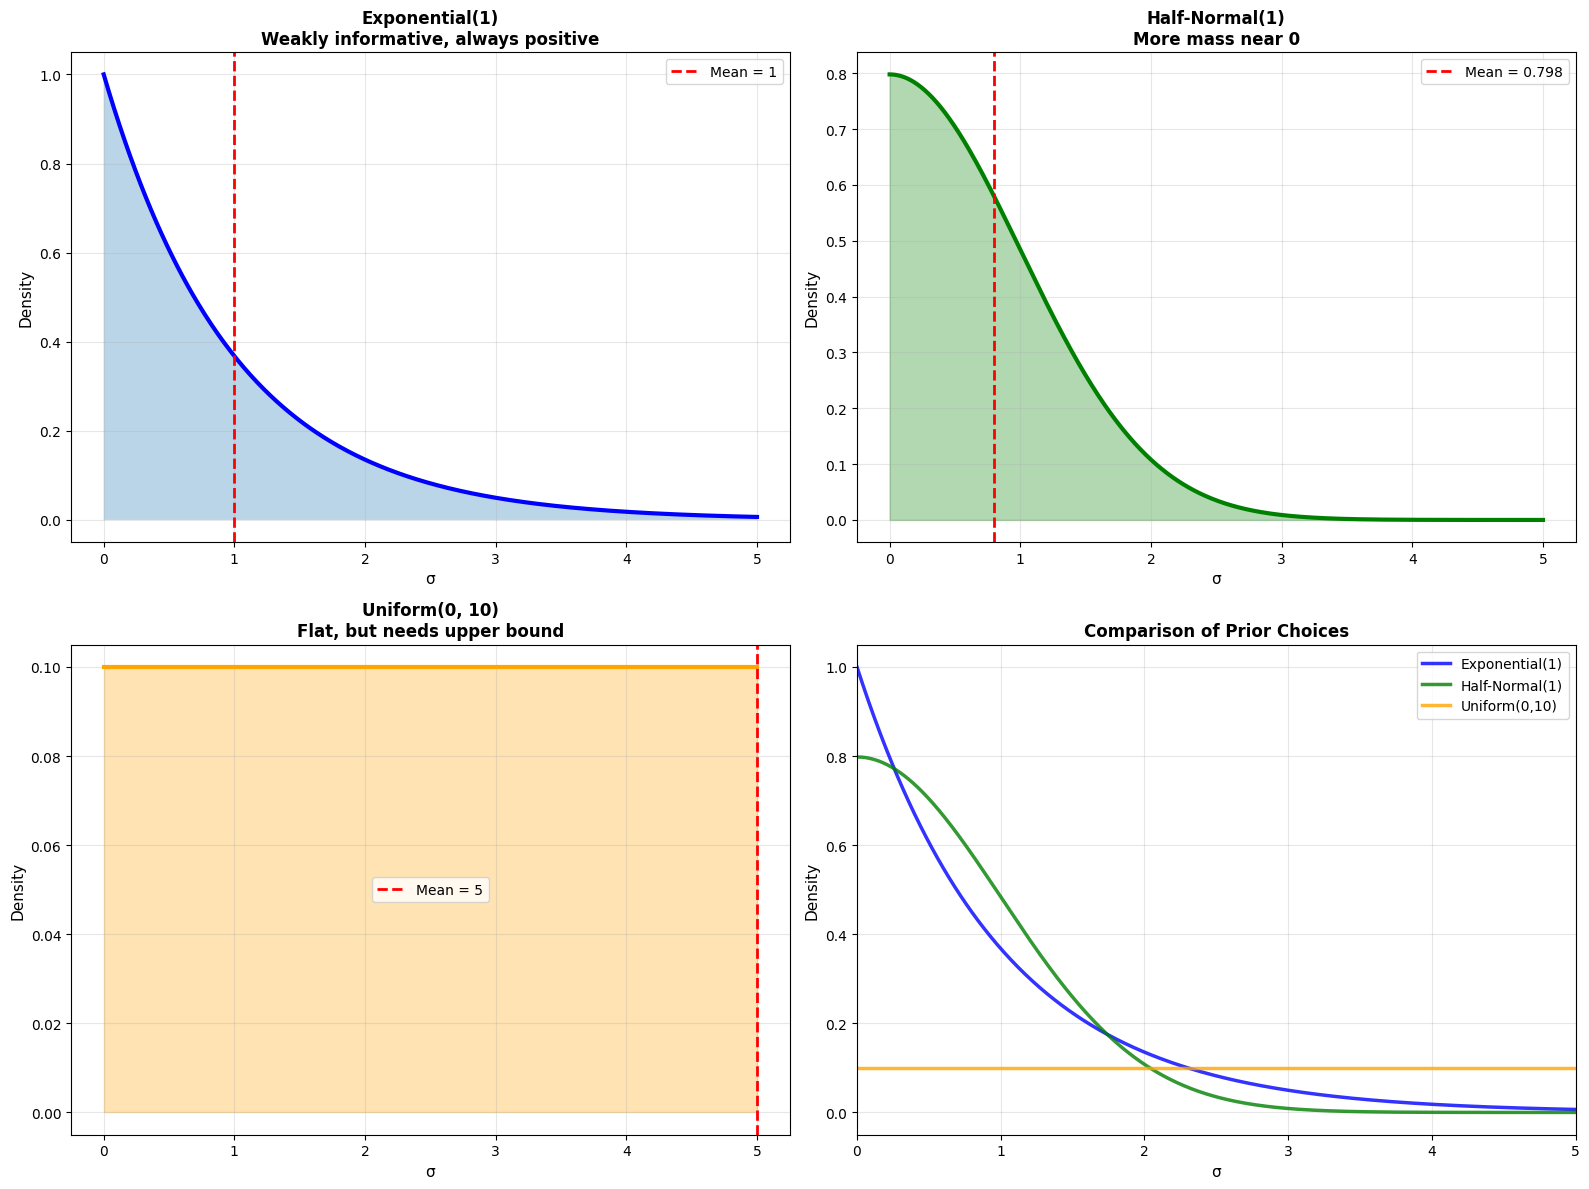

Why Choose Exponential(1) for σ?

✓ Always positive (σ must be > 0)
✓ Concentrates mass near 0 (prefer simpler models)
✓ Heavy tail (allows larger σ if needed)
✓ Weakly informative (doesn't overpower data)
✓ Computationally convenient
✓ No need to specify upper bound (unlike uniform)

Alternatives:
• Half-Normal: More mass very close to 0 (stronger regularization)
• Uniform: Flat, but requires choosing an upper bound
• Half-Cauchy: Even heavier tail (for hierarchical models)


In [8]:
# Compare different prior choices for σ
x = np.linspace(0, 5, 500)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Exponential(1) - Our choice
ax = axes[0, 0]
pdf_exp = stats.expon.pdf(x, scale=1)
ax.plot(x, pdf_exp, 'b-', linewidth=3)
ax.fill_between(x, pdf_exp, alpha=0.3)
ax.axvline(1, color='red', linestyle='--', linewidth=2, label='Mean = 1')
ax.set_title('Exponential(1)\nWeakly informative, always positive', fontsize=12, fontweight='bold')
ax.set_xlabel('σ', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Half-Normal(1) - Alternative
ax = axes[0, 1]
pdf_hn = stats.halfnorm.pdf(x, scale=1)
ax.plot(x, pdf_hn, 'g-', linewidth=3)
ax.fill_between(x, pdf_hn, alpha=0.3, color='green')
mean_hn = stats.halfnorm.mean(scale=1)
ax.axvline(mean_hn, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_hn:.3f}')
ax.set_title('Half-Normal(1)\nMore mass near 0', fontsize=12, fontweight='bold')
ax.set_xlabel('σ', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Uniform(0, 10) - Flat prior
ax = axes[1, 0]
pdf_unif = stats.uniform.pdf(x, loc=0, scale=10)
ax.plot(x, pdf_unif, 'orange', linewidth=3)
ax.fill_between(x, pdf_unif, alpha=0.3, color='orange')
ax.axvline(5, color='red', linestyle='--', linewidth=2, label='Mean = 5')
ax.set_title('Uniform(0, 10)\nFlat, but needs upper bound', fontsize=12, fontweight='bold')
ax.set_xlabel('σ', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Comparison
ax = axes[1, 1]
ax.plot(x, pdf_exp, 'b-', linewidth=2.5, label='Exponential(1)', alpha=0.8)
ax.plot(x, pdf_hn, 'g-', linewidth=2.5, label='Half-Normal(1)', alpha=0.8)
ax.plot(x, pdf_unif, 'orange', linewidth=2.5, label='Uniform(0,10)', alpha=0.8)
ax.set_title('Comparison of Prior Choices', fontsize=12, fontweight='bold')
ax.set_xlabel('σ', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 5)

plt.tight_layout()
plt.show()

print("Why Choose Exponential(1) for σ?")
print("="*70)
print("\n✓ Always positive (σ must be > 0)")
print("✓ Concentrates mass near 0 (prefer simpler models)")
print("✓ Heavy tail (allows larger σ if needed)")
print("✓ Weakly informative (doesn't overpower data)")
print("✓ Computationally convenient")
print("✓ No need to specify upper bound (unlike uniform)")
print("\nAlternatives:")
print("• Half-Normal: More mass very close to 0 (stronger regularization)")
print("• Uniform: Flat, but requires choosing an upper bound")
print("• Half-Cauchy: Even heavier tail (for hierarchical models)")

---

## Part 8: Connection to Poisson Process

The exponential distribution is intimately connected to the **Poisson process**.

### The Connection

If events occur according to a **Poisson process** with rate λ:

- **Number of events** in time interval t ~ Poisson(λt)
- **Waiting time** until next event ~ Exponential(λ)

**Example: Customer Arrivals**

Suppose customers arrive at rate λ = 2 per hour:

1. **How many customers in 1 hour?** ~ Poisson(2)
   - E[count] = 2 customers
   
2. **How long until next customer?** ~ Exponential(2)
   - E[time] = 1/2 = 0.5 hours = 30 minutes

---

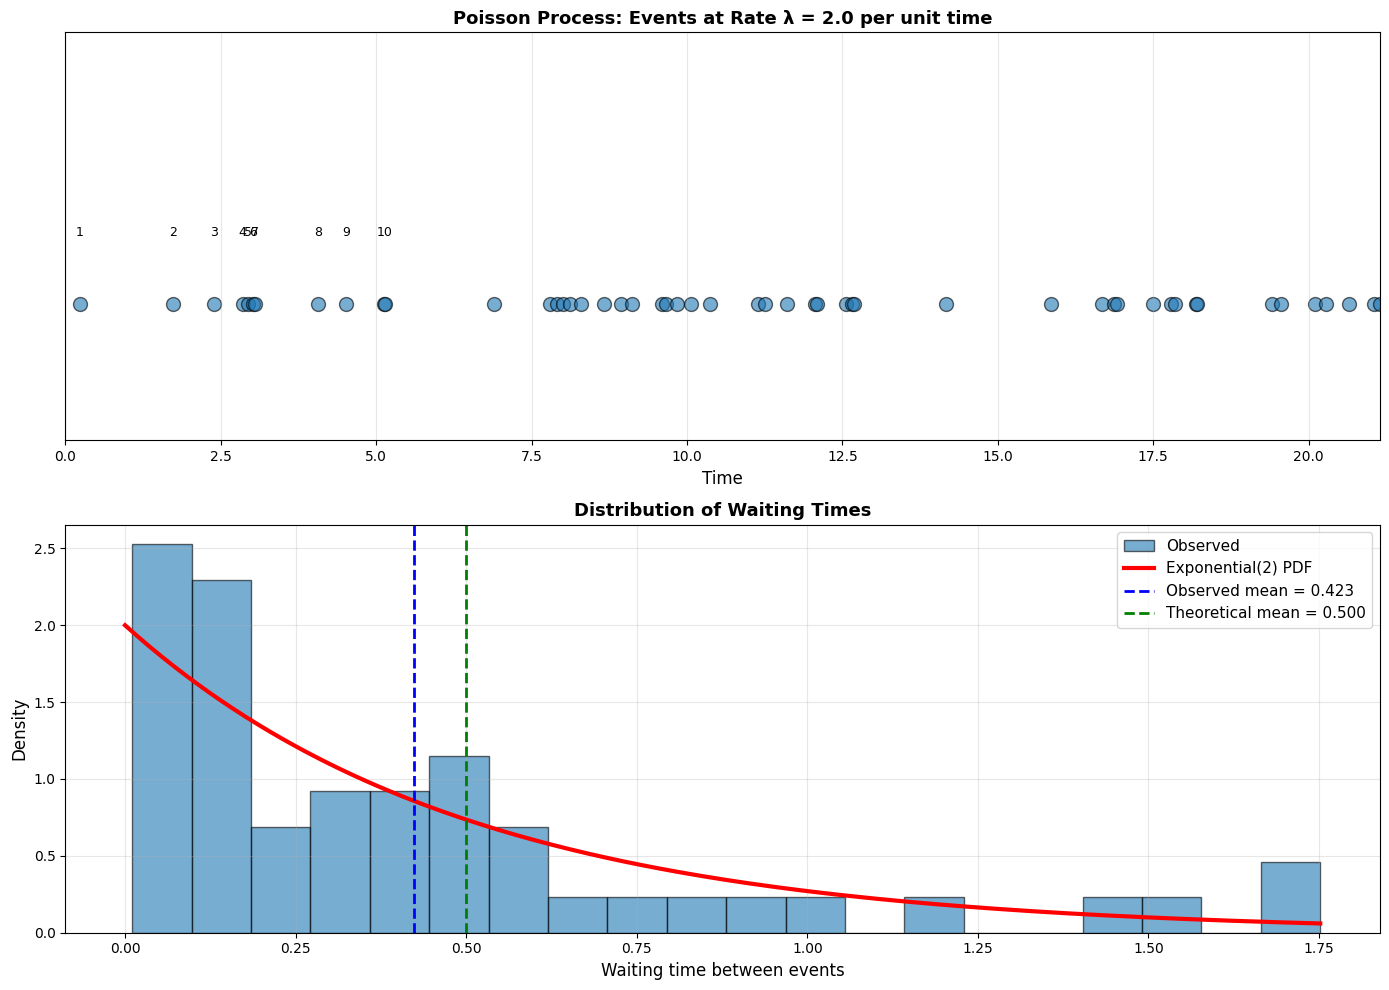

Poisson Process Simulation:
Rate: λ = 2.0 events per unit time
Expected waiting time: 0.500
Observed mean waiting: 0.423

Total time elapsed: 21.15 units
Total events: 50
Observed rate: 2.36 events per unit


In [9]:
# Simulate a Poisson process
rate = 2.0  # events per unit time
n_events = 50

# Generate waiting times
waiting_times = stats.expon.rvs(scale=1/rate, size=n_events, random_state=42)
event_times = np.cumsum(waiting_times)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Event timeline
ax = axes[0]
ax.scatter(event_times, np.ones_like(event_times), s=100, alpha=0.6, edgecolor='black')
for i, t in enumerate(event_times[:10]):  # Label first 10
    ax.text(t, 1.05, f'{i+1}', ha='center', fontsize=9)

ax.set_xlim(0, event_times[-1])
ax.set_ylim(0.9, 1.2)
ax.set_xlabel('Time', fontsize=12)
ax.set_title(f'Poisson Process: Events at Rate λ = {rate} per unit time', 
             fontsize=13, fontweight='bold')
ax.set_yticks([])
ax.grid(True, alpha=0.3, axis='x')

# Plot 2: Distribution of waiting times
ax = axes[1]
ax.hist(waiting_times, bins=20, density=True, alpha=0.6, edgecolor='black', label='Observed')

# Overlay theoretical exponential
x_range = np.linspace(0, waiting_times.max(), 200)
pdf = stats.expon.pdf(x_range, scale=1/rate)
ax.plot(x_range, pdf, 'r-', linewidth=3, label='Exponential(2) PDF')

ax.axvline(waiting_times.mean(), color='blue', linestyle='--', linewidth=2, 
           label=f'Observed mean = {waiting_times.mean():.3f}')
ax.axvline(1/rate, color='green', linestyle='--', linewidth=2, 
           label=f'Theoretical mean = {1/rate:.3f}')

ax.set_xlabel('Waiting time between events', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Waiting Times', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Poisson Process Simulation:")
print("="*70)
print(f"Rate: λ = {rate} events per unit time")
print(f"Expected waiting time: {1/rate:.3f}")
print(f"Observed mean waiting: {waiting_times.mean():.3f}")
print(f"\nTotal time elapsed: {event_times[-1]:.2f} units")
print(f"Total events: {n_events}")
print(f"Observed rate: {n_events / event_times[-1]:.2f} events per unit")

---

## Summary

### Key Properties of Exponential Distribution

**1. Definition**
- Models waiting times / time until event
- Always positive: $x \geq 0$
- One parameter: rate λ (or scale β = 1/λ)

**2. Parameters**
- **Rate λ**: events per unit time
- **Scale β = 1/λ**: mean waiting time
- Mean: E[X] = 1/λ = β
- Variance: Var[X] = 1/λ² = β²

**3. Shape**
- Maximum density at x = 0
- Monotonically decreasing
- Heavy tail (long waits possible but rare)

**4. Memoryless Property**
- P(X > s+t | X > s) = P(X > t)
- Only continuous distribution with this property
- Appropriate for constant-rate processes

**5. Why Use for σ Priors?**
- Always positive
- Concentrates mass near 0 (prefer smaller σ)
- Heavy tail (allows larger σ if needed)
- Weakly informative
- **Exponential(1)** is the standard choice

**6. Connection to Poisson**
- Poisson process with rate λ
- Waiting times ~ Exponential(λ)
- Event counts ~ Poisson(λt)

---

### When to Use Exponential Distribution

**Good for:**
- Waiting times with constant rate
- Time until failure (no aging)
- Priors on scale parameters (σ, variance, etc.)
- Radioactive decay

**Not good for:**
- Processes with memory/aging
- When rate changes over time
- Heavy-tailed distributions (use Pareto instead)

---

**Next:** Now that we understand the exponential distribution, we can properly interpret **σ ~ Exponential(1)** in our Bayesian models!